# Timeseries Climate Data

## forecasting for weather prediction
## Jena Climate Dataset

1. Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#load_data
climate = pd.read_csv('/content/drive/MyDrive/Dataset/jena_climate/jena_climate_2009_2016.csv')
climate

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


2. Data visualization

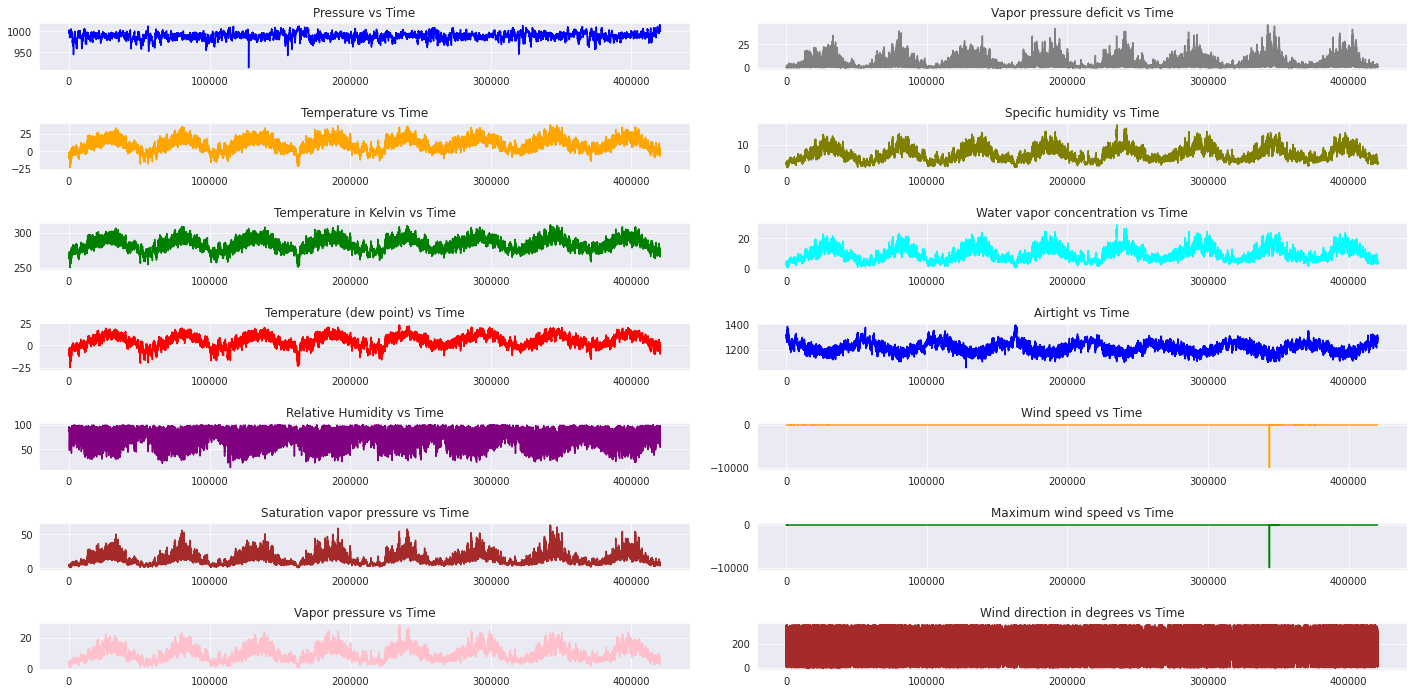

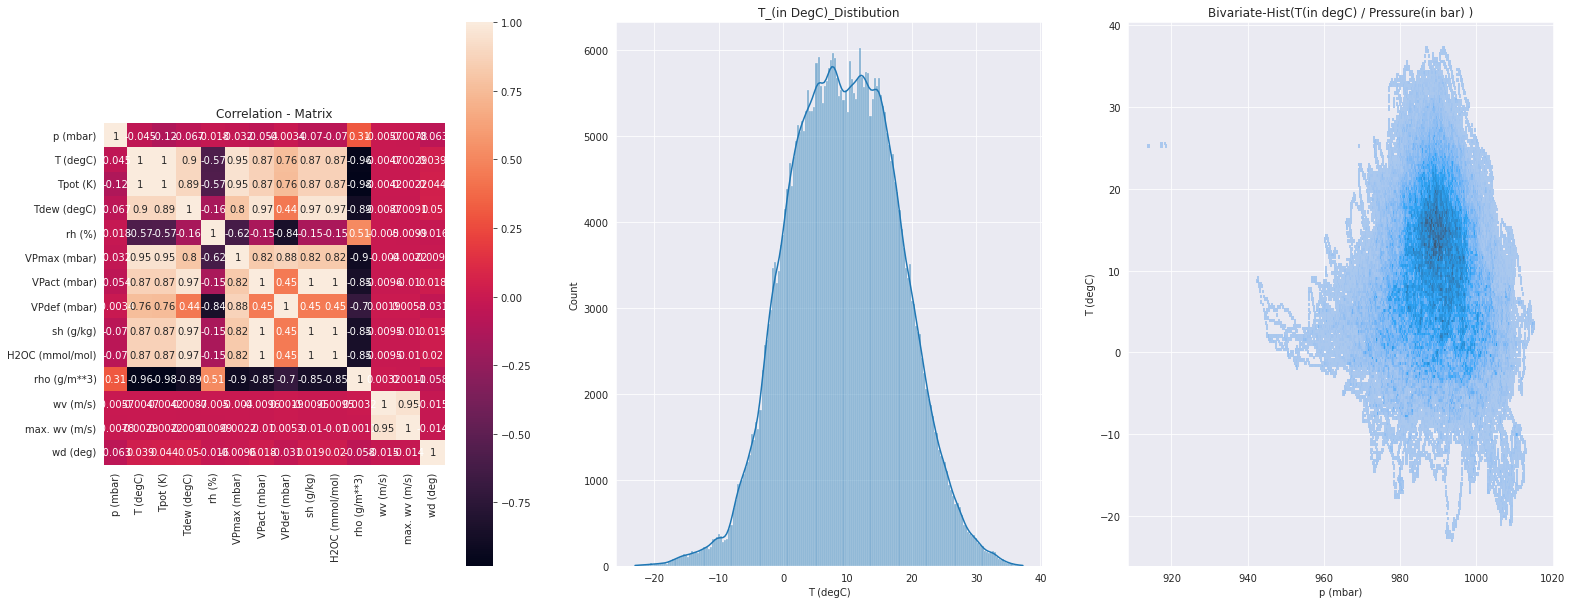

In [ ]:
all_cols = climate.columns
sns.set_style('darkgrid')
fig, axs = plt.subplots(7,2 , figsize=(20,10))

titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "brown",
]

# 시간에 따른 X의 변화 시각화
for i in range(len(titles)):
    
    if i<= 6:
        axs[i,0].set_title(f'{titles[i]} vs Time');
        axs[i,0].plot(range(len(climate[all_cols[0]])), climate[all_cols[i+1]],c = colors[i]);
    if i > 6:
        axs[i-7,1].set_title(f'{titles[i]} vs Time');
        axs[i-7,1].plot(range(len(climate[all_cols[0]])), climate[all_cols[i+1]],c = colors[i]);
        

plt.tight_layout(pad=2)
plt.show()

# 날씨 요소간 상관관계 파악을 위해 히트맵 출력
fig, ax = plt.subplots(1,3, figsize = (26,10))
climate_corr = climate.corr()
ax[0].set_title('Correlation - Matrix')
sns.heatmap(climate_corr, square=True, annot=True, ax=ax[0]);

ax[1].set_title('T_(in DegC)_Distibution')
sns.histplot(climate[all_cols[2]], ax = ax[1], kde =True);
 
ax[2].set_title('Bivariate-Hist(T(in degC) / Pressure(in bar) )')
sns.histplot(
    climate, x=all_cols[1], y=all_cols[2],
    discrete=(False, False), log_scale=(False, False), ax= ax[2]
);

plt.show()

3. Data Pre-processing

In [ ]:
new_climate = climate.loc[:, ['Date Time', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)',
                             'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)']]
new_climate

,Date Time,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3)
0,01.01.2009 00:10:00,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75
1,01.01.2009 00:20:00,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80
2,01.01.2009 00:30:00,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24
3,01.01.2009 00:40:00,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19
4,01.01.2009 00:50:00,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00
...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98
420547,31.12.2016 23:30:00,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44
420548,31.12.2016 23:40:00,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39
420549,31.12.2016 23:50:00,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56


In [ ]:
date_time = pd.to_datetime(new_climate.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
new_climate

,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3)
0,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75
1,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80
2,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24
3,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19
4,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00
...,...,...,...,...,...,...,...,...,...,...
420546,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98
420547,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44
420548,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39
420549,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56


In [ ]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day


new_climate['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
new_climate['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
new_climate['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
new_climate['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [ ]:
new_climate.head()

,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Day sin,Day cos,Year sin,Year cos
0,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,0.043619,0.999048,0.009452,0.999955
1,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.087156,0.996195,0.009571,0.999954
2,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.130526,0.991445,0.009691,0.999953
3,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.173648,0.984808,0.009810,0.999952
4,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.216440,0.976296,0.009930,0.999951


In [ ]:
new_climate.tail()

,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Day sin,Day cos,Year sin,Year cos
420546,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,-1.736482e-01,0.984808,0.009887,0.999951
420547,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,-1.305262e-01,0.991445,0.010006,0.999950
420548,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,-8.715574e-02,0.996195,0.010126,0.999949
420549,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,-4.361939e-02,0.999048,0.010245,0.999948
420550,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,2.504006e-13,1.000000,0.010364,0.999946


In [ ]:
split_fraction = 0.75075
train_split = int(split_fraction * int(new_climate.shape[0]))

step = 6
past = 720
future = 72
batch_size = 32

data_mean = new_climate[:train_split].mean(axis=0)
data_std = new_climate[:train_split].std(axis=0)

new_climate=(new_climate-data_mean)/data_std

In [ ]:
new_climate=new_climate.values
new_climate = pd.DataFrame(new_climate)
new_climate.head()

train_data = new_climate.loc[0 : train_split - 1]
val_data = new_climate.loc[train_split:]

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.015259,-2.075258,-1.976874,1.026199,-1.324583,-1.511443,-0.779410,-1.514426,-1.516700,2.251541,0.061829,1.413125,0.012126,1.414883
1,-2.060942,-2.120559,-2.031777,1.032276,-1.337777,-1.532865,-0.781523,-1.533176,-1.537863,2.302216,0.123401,1.409090,0.012295,1.414882
2,-2.072655,-2.132175,-2.036112,1.062661,-1.340416,-1.535245,-0.783635,-1.536926,-1.540214,2.313093,0.184738,1.402373,0.012464,1.414880
3,-2.049228,-2.107782,-2.001436,1.080892,-1.333819,-1.520964,-0.785748,-1.521926,-1.526106,2.287137,0.245724,1.392987,0.012633,1.414878
4,-2.044543,-2.104297,-1.997102,1.074815,-1.332499,-1.518584,-0.785748,-1.521926,-1.523754,2.282441,0.306242,1.380950,0.012802,1.414877


In [ ]:
val_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
315728,-0.821647,-0.986876,-0.400580,1.366514,-0.821883,-0.568883,-0.808989,-0.603168,-0.601974,1.342107,-0.184458,1.402373,0.000381,1.414945
315729,-0.820475,-0.985714,-0.400580,1.360437,-0.820564,-0.568883,-0.806876,-0.603168,-0.601974,1.340871,-0.123121,1.409090,0.000550,1.414945
315730,-0.822818,-0.989199,-0.403470,1.360437,-0.821883,-0.571263,-0.806876,-0.603168,-0.604325,1.344826,-0.061549,1.413125,0.000719,1.414945
315731,-0.834532,-1.000815,-0.417918,1.360437,-0.828480,-0.585544,-0.806876,-0.614418,-0.616083,1.355702,0.000140,1.414471,0.000888,1.414945
315732,-0.823989,-0.989199,-0.403470,1.366514,-0.823202,-0.571263,-0.808989,-0.603168,-0.601974,1.344826,0.061829,1.413125,0.001057,1.414945


4. Experiment 

1. Basic LSTM

In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(10)]].values
y_train = new_climate.iloc[start:end][[1]]

sequence_length = int(past / step) # 120

In [ ]:
print('X_train shape == {}.'.format(x_train.shape)) # feature 10가지
print('y_train shape == {}.'.format(y_train.shape)) # 예측값 1

X_train shape == (315728, 10).
y_train shape == (315728, 1).


In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(10)]].values
y_val = new_climate.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 120, 10)
Target shape: (32, 1)


In [ ]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(24)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 10)]         0         
                                                                 
 lstm (LSTM)                 (None, 24)                3360      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 3,385
Trainable params: 3,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
          dataset_train,
          epochs=5,
          validation_data=dataset_val)

Epoch 1/5
9845/9845 [==============================] - 456s 46ms/step - loss: 0.1802 - val_loss: 0.2608
Epoch 2/5
9845/9845 [==============================] - 455s 46ms/step - loss: 0.1461 - val_loss: 0.2524
Epoch 3/5
9845/9845 [==============================] - 458s 46ms/step - loss: 0.1358 - val_loss: 0.2152
Epoch 4/5
9845/9845 [==============================] - 457s 46ms/step - loss: 0.1313 - val_loss: 0.2073
Epoch 5/5
9845/9845 [==============================] - 456s 46ms/step - loss: 0.1435 - val_loss: 0.2257


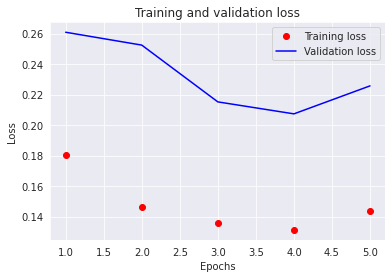

In [ ]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()